# 1.0 - CODIGO GENERAL

## 1.1 - LIBRERIAS

In [6]:
#importo librerias
import pandas as pd #Manejo de dataframes
import numpy as np #Creacion de arrays y manejo de estadisticas
import missingno as msno #Utilizada en la visualizacion de valores nulos
import re #utilizada en la parte de limpieza de caracteres extranos
import scipy.stats as st #Utilizacion para optencion de estadisticas
import matplotlib.pyplot as plt

## 1.2 - VALORES NULOS TIPICOS

In [7]:
# Listas de valores nulos comunes
common_na_strings = ["faltante", "NA", "N A", "N/A", "#N/A", "NA ", " NA", "N /A", "N / A", " N / A",
                    "N / A ", "na", "n a", "n/a", "na "," na", "n /a", "n / a", " a / a", "n / a ",
                    "NULO", "nulo", "", "?", "*", "."]

common_na_numeros = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

In [29]:
#Porcentaje de nulos sobre el total de datos
def porcentaje_total_nulos(df, conjunto):
    total_datos = len(df)
    diccionario_porcentajes_nulos = {}
    for col in conjunto.index:
        porcentaje = str(round((conjunto[col] / total_datos * 100), 2)) + '%'
        diccionario_porcentajes_nulos[col] = porcentaje
    
    return diccionario_porcentajes_nulos

In [10]:
#Porcentaje de nulos sobre columnas con valores nulos
def porcentaje_nulos(conjunto):
    total_nulos = conjunto.values.sum()
    diccionario_porcentajes_nulos = {}
    for col in conjunto.index:
        porcentaje = str(round((conjunto[col] / total_nulos * 100), 2)) + '%'
        diccionario_porcentajes_nulos[col] = porcentaje
    
    return diccionario_porcentajes_nulos

# 2.0 - CSV DENUNCIAS

### 2.1 - CARGA

In [11]:
#Data frames de denuncias
#Denuncias
df_denuncias = pd.read_csv('../datos/csv brutos/oficina-rescate-denuncias-202001-202307.csv', index_col=None)

In [12]:
df_denuncias.sample(2, random_state = 4)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,...,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
478,2020-04-17,NaN,505455505,Urgencia,Ciudadano,No,Trata,Grooming,Buenos Aires,Florencio Varela,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5620,2023-05-31,14:28,2545751535,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Santa Fe,Rosario,...,NaN,NaN,NaN,Santa Fe,NaN,Denunciante - ciudadano,NaN,Mujer,0.0,82.0


### 2.2 - COLUMNAS

#### 2.2.1 - ELIMINACION COLUMNAS

In [13]:
# Renombrar y eliminar columnas en df_denuncias
df_denuncias2 = df_denuncias.drop([
    'hora_ingreso',
    'provincia_indec_id',
    'derivacion2_institucion',
    'derivacion2_fecha',
    'derivacion2_judicializa',
    'derivacion3_institucion',
    'derivacion3_fecha',
    'derivacion3_judicializa',
    'denunciante_nacionalidad',
    'denunciante_localidad'], axis=1)

In [14]:
df_denuncias.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,...,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
2459,2021-08-06,NaN,7594845515,Urgencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Trenque Lauquen,...,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,50.0,6.0
1507,2021-01-13,NaN,4555359415,Urgencia,Ciudadano,No,Trata,Persona desaparecida,Buenos Aires,La Plata,...,NaN,NaN,NaN,Buenos Aires,La Plata,Denunciante - ciudadano,NaN,Mujer,35.0,6.0
924,2020-08-14,NaN,3565356505,Urgencia,Ciudadano,Sí,Trata,Explotación sexual,Buenos Aires,La Plata,...,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,Derivado de otro organismo,NaN,26.0,6.0


### 2.3 - VALORES

### 2.4 - CARACTERES EXTRANOS

In [15]:
#Sin simbolos extranos

### 2.5 - NULOS

In [16]:
df_denuncias = df_denuncias.replace(
    to_replace = common_na_strings,
    value = np.nan
).replace(
    to_replace = common_na_numeros,
    value = np.nan
)

<AxesSubplot:>

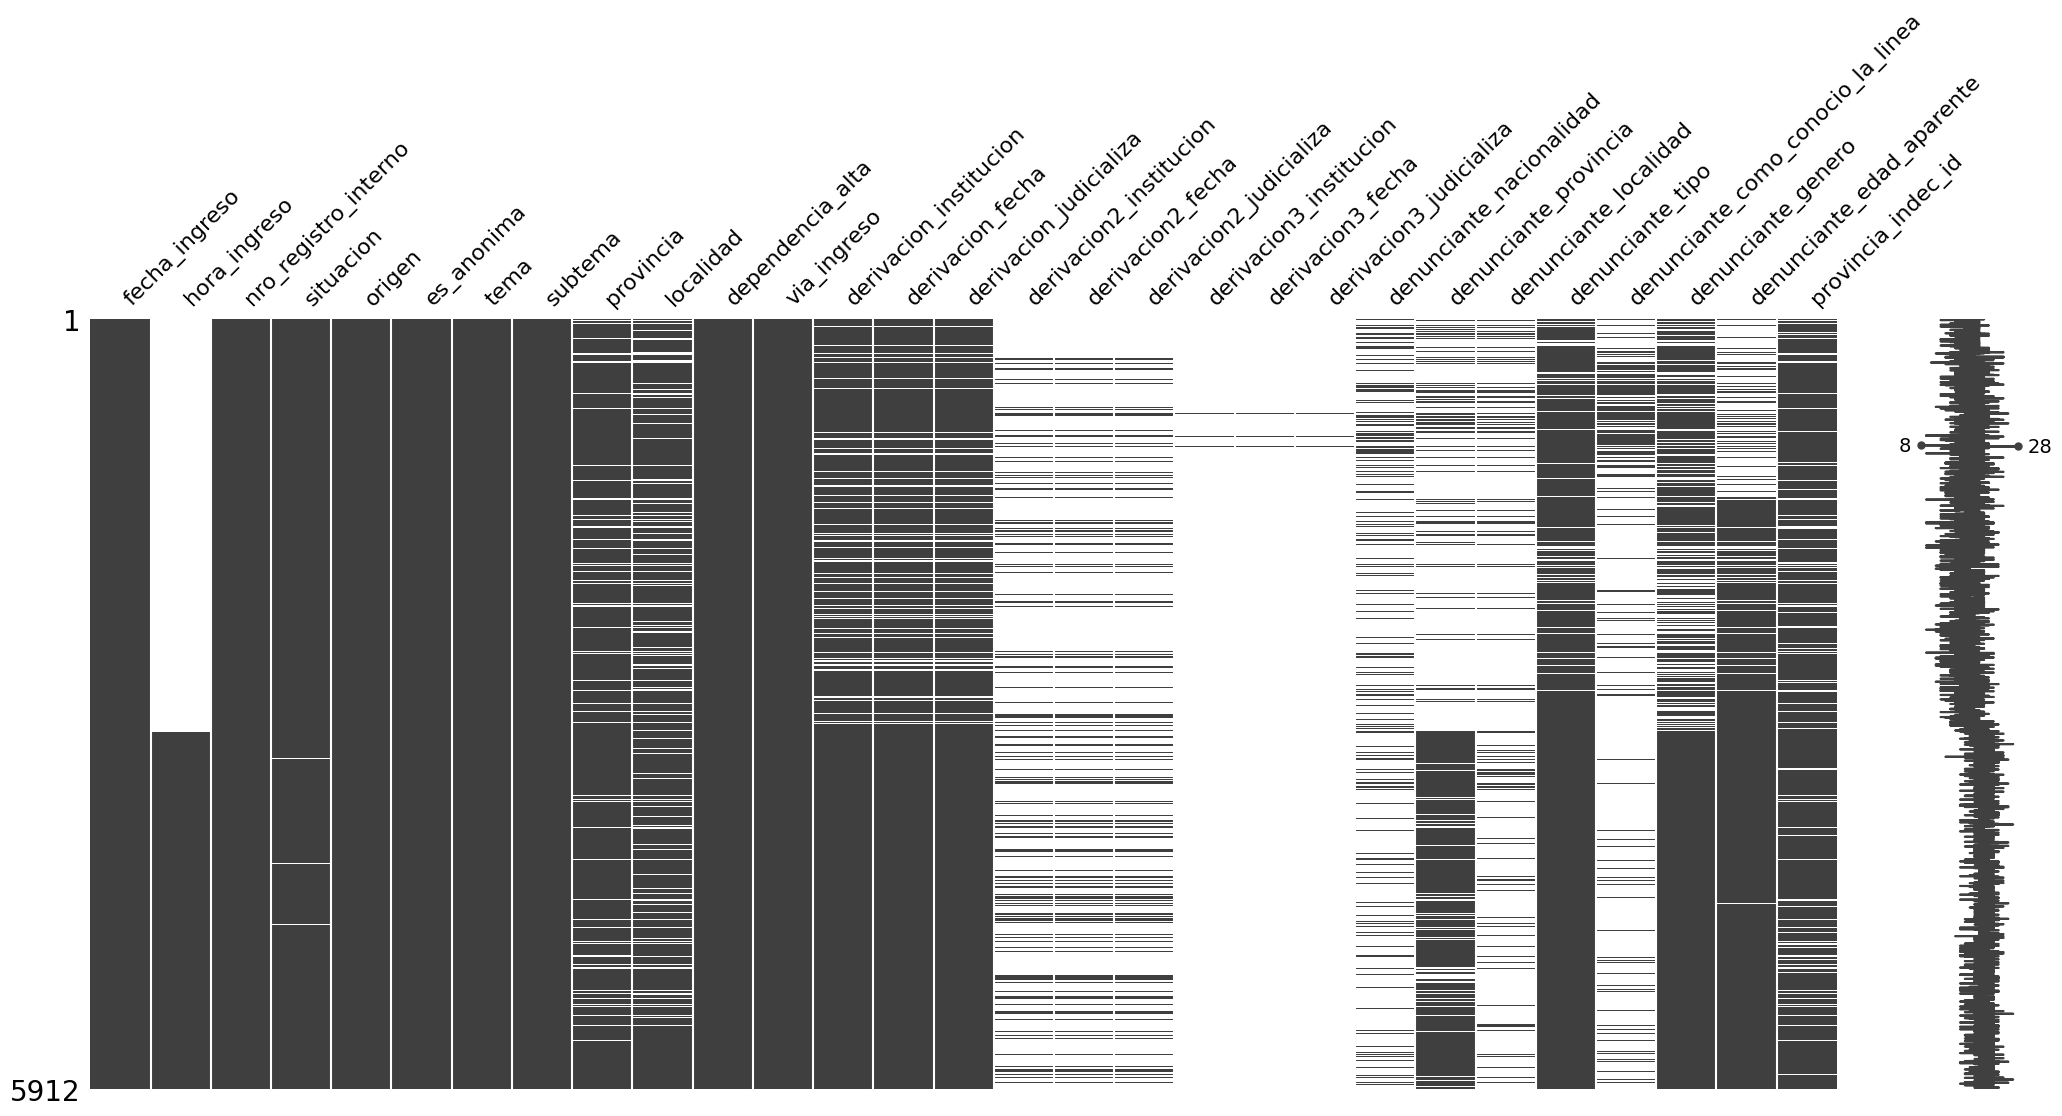

In [17]:
msno.matrix(df_denuncias)

In [18]:
#valores nulos por columnas
df_denuncias.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         3168
nro_registro_interno                    0
situacion                              20
origen                                  0
es_anonima                              0
tema                                    0
subtema                                 0
provincia                             471
localidad                             873
dependencia_alta                        0
via_ingreso                             1
derivacion_institucion                409
derivacion_fecha                      409
derivacion_judicializa                409
derivacion2_institucion              4754
derivacion2_fecha                    4754
derivacion2_judicializa              4754
derivacion3_institucion              5892
derivacion3_fecha                    5892
derivacion3_judicializa              5892
denunciante_nacionalidad             4837
denunciante_provincia                2887
denunciante_localidad             

In [19]:
diccionario_nulos = porcentaje_nulos(df_denuncias.isnull().sum())

In [32]:
porcentaje_total_nulos(df_denuncias, df_denuncias.isnull().sum())

{'fecha_ingreso': '0.0%',
 'hora_ingreso': '53.59%',
 'nro_registro_interno': '0.0%',
 'situacion': '0.34%',
 'origen': '0.0%',
 'es_anonima': '0.0%',
 'tema': '0.0%',
 'subtema': '0.0%',
 'provincia': '7.97%',
 'localidad': '14.77%',
 'dependencia_alta': '0.0%',
 'via_ingreso': '0.02%',
 'derivacion_institucion': '6.92%',
 'derivacion_fecha': '6.92%',
 'derivacion_judicializa': '6.92%',
 'derivacion2_institucion': '80.41%',
 'derivacion2_fecha': '80.41%',
 'derivacion2_judicializa': '80.41%',
 'derivacion3_institucion': '99.66%',
 'derivacion3_fecha': '99.66%',
 'derivacion3_judicializa': '99.66%',
 'denunciante_nacionalidad': '81.82%',
 'denunciante_provincia': '48.83%',
 'denunciante_localidad': '86.89%',
 'denunciante_tipo': '5.67%',
 'denunciante_como_conocio_la_linea': '82.48%',
 'denunciante_genero': '17.51%',
 'denunciante_edad_aparente': '21.87%',
 'provincia_indec_id': '10.64%'}

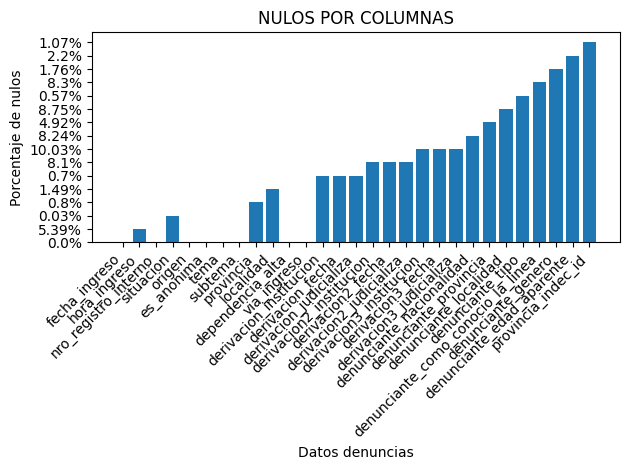

In [33]:
plt.bar(diccionario_nulos.keys(), diccionario_nulos.values())
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Datos denuncias')
plt.ylabel('Porcentaje de nulos')
plt.title('NULOS POR COLUMNAS')
plt.tight_layout()  # Ajustar el diseño
plt.show()

### 2.6 - GUARDADO CSV LIMPIO

In [133]:
df_denuncias.to_csv('../datos/csv procesados/limpios_denuncias.csv', index=False)

### 2.7 OBSERVACIONES

Algunas columnas tienen porcentajes preocupantes de valores faltantes. Por ejemplo, "hora_ingreso" presenta un **53.59%**, "derivacion2_institucion" un **80.41%**, "derivacion3_institucion" un **99.66%**, "denunciante_nacionalidad" un **81.82%**, "denunciante_localidad" un **86.89%** y "denunciante_como_conocio_la_linea" un **82.48%**.

**Será en la etapa de Análisis Exploratorio de Datos (EDA) donde tomarémos decisiones sobre cómo manejar estos valores faltantes**. Evaluarémos la naturaleza de los datos y los objetivos del análisis para determinar las estrategias más adecuadas. Esto podría involucrar técnicas de imputación de datos, eliminación de filas o columnas en casos extremos, y la evaluación de posibles impactos en los resultados.

# 3.0 - CSV ORIENTACIONES


### 3.1.0 - LECTURA

In [34]:
#dataframes de orientaciones
df_orientaciones = pd.read_csv('../datos/csv brutos/oficina-rescate-orientaciones-202001-202307.csv')

In [35]:
df_orientaciones.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,consultante_nacionalidad,consultante_provincia,consultante_localidad,consultante_tipo,consultante_como_conocio_la_linea,consultante_genero,consultante_edad_aparente,provincia_indec_id
4372,2023-01-18,22:17,575258435,Urgencia,Ciudadano,Sí,Violencias,Familiar > asesoramiento para realizar denuncia,Corrientes,Santo Tome,PNR - Línea 145,Línea 145,NaN,Corrientes,NaN,Consultante,NaN,Hombre,30.0,18
93,2020-02-04,NaN,555754505,Urgencia,Ciudadano,Si,Trata,"Pornografía infantil, perverso",Córdoba,Córdoba,PNR - Línea 145,Línea 145,NaN,Córdoba,Córdoba,Consultante,NaN,Hombre,NaN,14
3129,2022-02-15,15:04,6535050525,Urgencia,Ciudadano,No,Trata,Salud mental,Ciudad Autónoma de Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,NaN,Ciudad Autónoma de Buenos Aires,NaN,Consultante,NaN,Mujer cis,0.0,02


### 3.1.1 - COLUMNAS

In [39]:
df_denuncias.columns

Index(['fecha_ingreso', 'hora_ingreso', 'nro_registro_interno', 'situacion',
       'origen', 'es_anonima', 'tema', 'subtema', 'provincia', 'localidad',
       'dependencia_alta', 'via_ingreso', 'derivacion_institucion',
       'derivacion_fecha', 'derivacion_judicializa', 'derivacion2_institucion',
       'derivacion2_fecha', 'derivacion2_judicializa',
       'derivacion3_institucion', 'derivacion3_fecha',
       'derivacion3_judicializa', 'denunciante_nacionalidad',
       'denunciante_provincia', 'denunciante_localidad', 'denunciante_tipo',
       'denunciante_como_conocio_la_linea', 'denunciante_genero',
       'denunciante_edad_aparente', 'provincia_indec_id'],
      dtype='object')

In [36]:
# Renombrar y eliminar columnas en df_denuncias
# Sin columnas a eliminar

In [40]:
df_orientaciones.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,via_ingreso,consultante_provincia,consultante_como_conocio_la_linea,consultante_edad_aparente
4372,2023-01-18,22:17,575258435,Urgencia,Ciudadano,Sí,Violencias,Familiar > asesoramiento para realizar denuncia,Corrientes,Santo Tome,Línea 145,Corrientes,NaN,30.0
93,2020-02-04,NaN,555754505,Urgencia,Ciudadano,Si,Trata,"Pornografía infantil, perverso",Córdoba,Córdoba,Línea 145,Córdoba,NaN,NaN
3129,2022-02-15,15:04,6535050525,Urgencia,Ciudadano,No,Trata,Salud mental,Ciudad Autónoma de Buenos Aires,Buenos Aires,Línea 145,Ciudad Autónoma de Buenos Aires,NaN,0.0


### 3.1.2 - VALORES

### 3.1.3 - CARACTERES EXTRANOS

In [41]:
#Sin simbolos extranos

### 3.1.4 - NULOS

In [42]:
df_orientaciones = df_orientaciones.replace(
    to_replace = common_na_strings,
    value = np.nan
).replace(
    to_replace = common_na_numeros,
    value = np.nan
)

<AxesSubplot:>

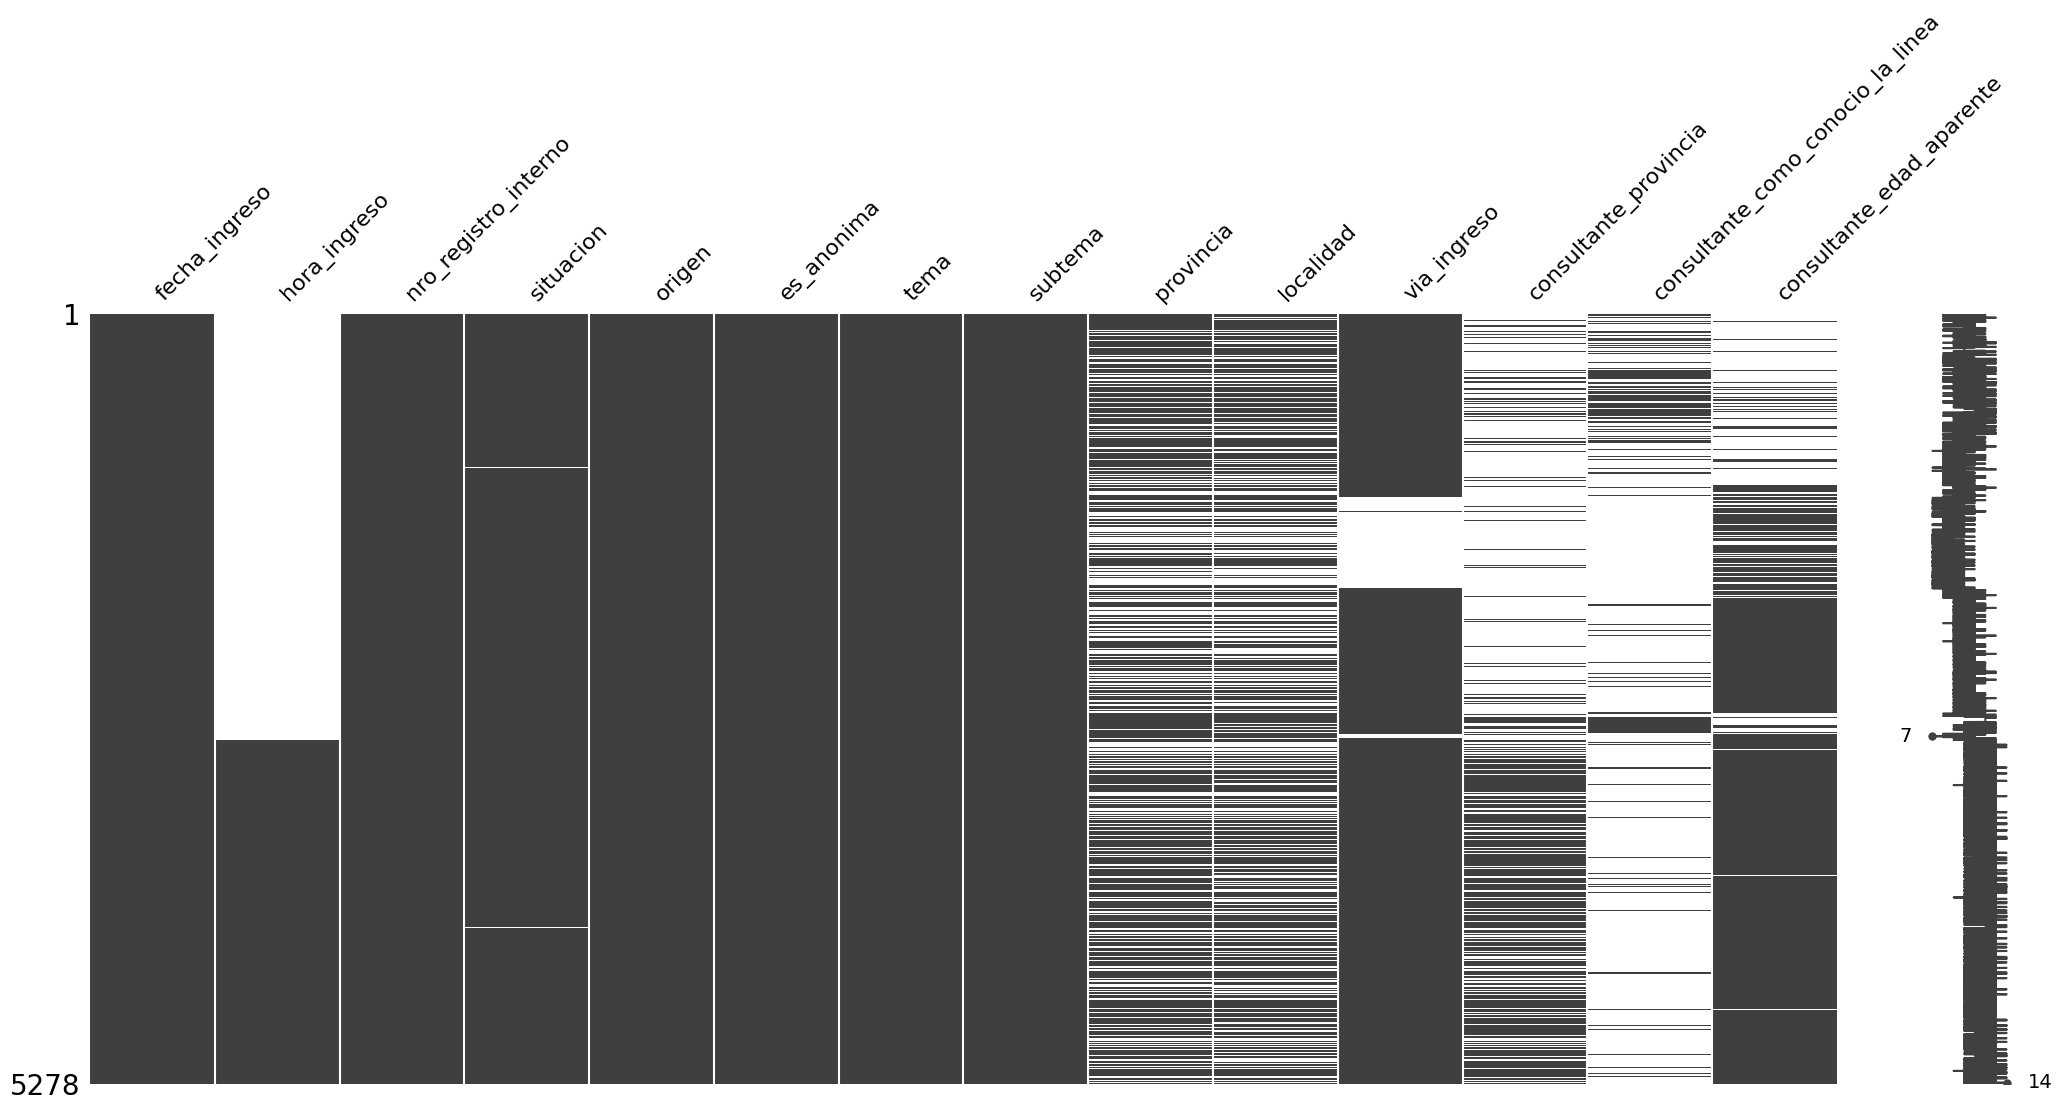

In [43]:
msno.matrix(df_orientaciones)

In [44]:
#valores nulos por columnas
df_orientaciones.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         2920
nro_registro_interno                    0
situacion                              10
origen                                  0
es_anonima                              0
tema                                    5
subtema                                 5
provincia                            1928
localidad                            2176
via_ingreso                           639
consultante_provincia                3080
consultante_como_conocio_la_linea    4449
consultante_edad_aparente            1306
dtype: int64

In [45]:
diccionario_nulos = porcentaje_nulos(df_orientaciones.isnull().sum())

In [48]:
porcentaje_total_nulos(df_orientaciones, df_orientaciones.isnull().sum())

{'fecha_ingreso': '0.0%',
 'hora_ingreso': '55.32%',
 'nro_registro_interno': '0.0%',
 'situacion': '0.19%',
 'origen': '0.0%',
 'es_anonima': '0.0%',
 'tema': '0.09%',
 'subtema': '0.09%',
 'provincia': '36.53%',
 'localidad': '41.23%',
 'via_ingreso': '12.11%',
 'consultante_provincia': '58.36%',
 'consultante_como_conocio_la_linea': '84.29%',
 'consultante_edad_aparente': '24.74%'}

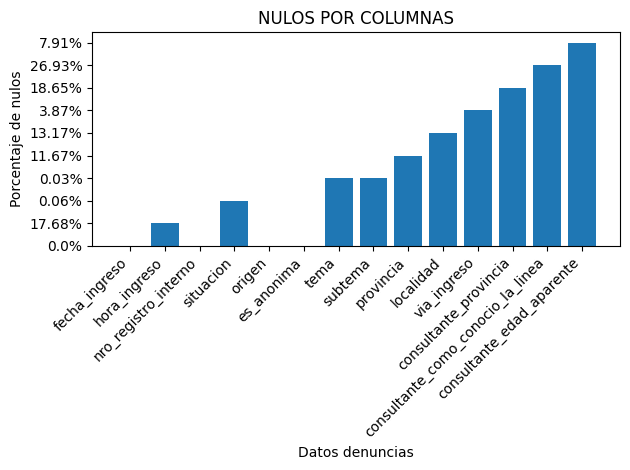

In [146]:
plt.bar(diccionario_nulos.keys(), diccionario_nulos.values())
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Datos denuncias')
plt.ylabel('Porcentaje de nulos')
plt.title('NULOS POR COLUMNAS')
plt.tight_layout()  # Ajustar el diseño
plt.show()

### 3.1.5 - GUARDADO CSV LIMPIO

In [148]:
df_orientaciones.to_csv('../datos/csv procesados/limpios_orientaciones.csv', index=False)

### 3.1.6 - OBSERVACIONES:

**Varias columnas muestran** porcentajes preocupantes de valores faltantes. Por ejemplo, "hora_ingreso" **registra** un 55.32%, "provincia" **presenta** un 36.53%, "localidad" **tiene** un 41.23%, "via_ingreso" **acumula** un 12.11%, "consultante_provincia" **alcanza** un 58.36%, "consultante_como_conocio_la_linea" **alcanza** un 84.29%, y "consultante_edad_aparente" **cuenta con** un 24.74%.

La etapa de Análisis Exploratorio de Datos (EDA) **será el momento clave** para tomar decisiones informadas acerca de cómo manejar estos valores faltantes. **Evaluaremos** la naturaleza de los datos y los objetivos específicos del análisis para determinar las estrategias más adecuadas. Esto podría involucrar técnicas de imputación de datos, eliminación de filas o columnas en casos extremos, y **una evaluación detallada de los posibles efectos en los resultados**.